In [ ]:
"""
1. Using the MNIST Handwritten Digits dataset you have to build a model that can classify an image
into a number from 0 to 9.
2. You have to load the digits
3. Analyze the shape of the data
4. Print some images to screen with their labels
5. Train a model
6. Make classifications on the model
7. Test the accuracy by visualizing a confusion matrix
8. Print and analyze some of the misclassified data 
"""

In [20]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

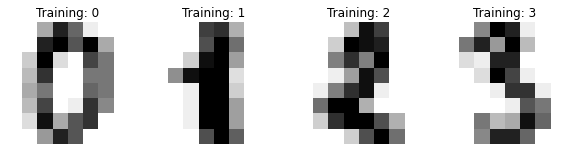

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [7]:
n_samples = len(digits.images)

In [8]:
data = digits.images.reshape((n_samples, -1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False, random_state=40)

In [15]:
clf = LogisticRegression(solver="lbfgs", max_iter=5000)

In [16]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [17]:
predicted = clf.predict(X_test)

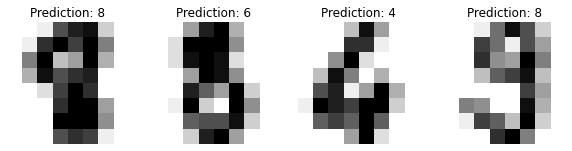

In [18]:
#Predicted digit values printed as images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(max_iter=5000):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.96      0.88      0.92        91
           2       0.99      0.98      0.98        86
           3       0.96      0.85      0.90        91
           4       0.98      0.92      0.95        92
           5       0.90      0.96      0.93        91
           6       0.92      0.99      0.95        91
           7       0.97      0.96      0.96        89
           8       0.87      0.89      0.88        88
           9       0.83      0.95      0.88        92

    accuracy                           0.93       899
   macro avg       0.94      0.93      0.93       899
weighted avg       0.94      0.93      0.93       899




Confusion matrix:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 80  0  1  0  0  0  0  2  8]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  7  1]
 [ 0  0  0  0 85  0  3  0  0  4]
 [ 0  0  0  0  0 87  2  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 85  1  2]
 [ 0  2  1  0  0  4  1  1 78  1]
 [ 1  0  0  0  0  2  0  0  2 87]]


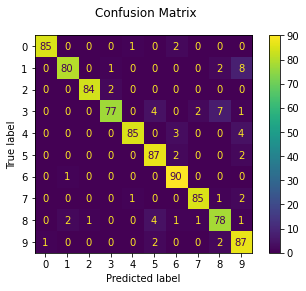

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [23]:
accuracy_score(predicted,y_test)

0.932146829810901